In [1]:
import easyocr
import cv2
from matplotlib import pyplot as plt
import numpy as np

In [2]:
image_path = 'manylines.png'
# image_path = 'FreeasBird.png'


In [3]:
render = easyocr.Reader(['en'], gpu=True)
result = render.readtext(image_path)
result

[([[225, 151], [301, 151], [301, 167], [225, 167]],
  'Multiple',
  0.9903289912448658),
 ([[315, 151], [381, 151], [381, 167], [315, 167]],
  'ines of',
  0.8623450408635276),
 ([[387, 153], [425, 153], [425, 167], [387, 167]],
  'text',
  0.9999855756759644),
 ([[201, 169], [323, 169], [323, 185], [201, 185]],
  'more multiple',
  0.9948964390496788),
 ([[329, 169], [377, 169], [377, 183], [329, 183]],
  'lines',
  0.988638656599615),
 ([[383, 169], [405, 169], [405, 183], [383, 183]], 'of', 0.9858704358871834),
 ([[411, 169], [449, 169], [449, 183], [411, 183]], 'text', 0.995325057294976),
 ([[149, 185], [215, 185], [215, 201], [149, 201]],
  'another',
  0.9996045105436363),
 ([[221, 185], [287, 185], [287, 201], [221, 201]],
  'line of',
  0.6479401763779807),
 ([[293, 185], [341, 185], [341, 201], [293, 201]],
  'lines',
  0.9759879573227912),
 ([[347, 183], [413, 183], [413, 201], [347, 201]],
  'bla bla',
  0.9966612188096734),
 ([[419, 185], [457, 185], [457, 201], [419, 201]]

In [4]:
top_left = tuple(result[0][0][0])
bottom_right = tuple(result[0][0][2])
text = result[0][1]
font = cv2.FONT_HERSHEY_SIMPLEX

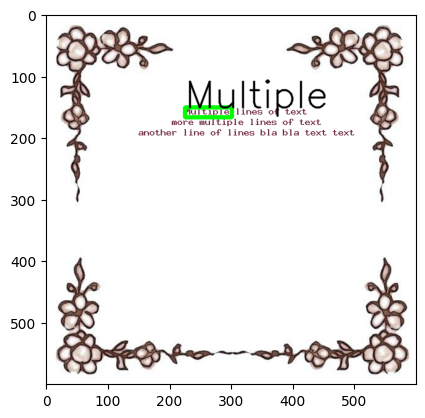

In [5]:
img = cv2.imread(image_path)
img = cv2.rectangle(img, top_left, bottom_right, (0,255,0), 5)
img = cv2.putText(img, text, top_left, font, 2, (0,0,0), 2, cv2.LINE_AA)
plt.imshow(img)
plt.show()

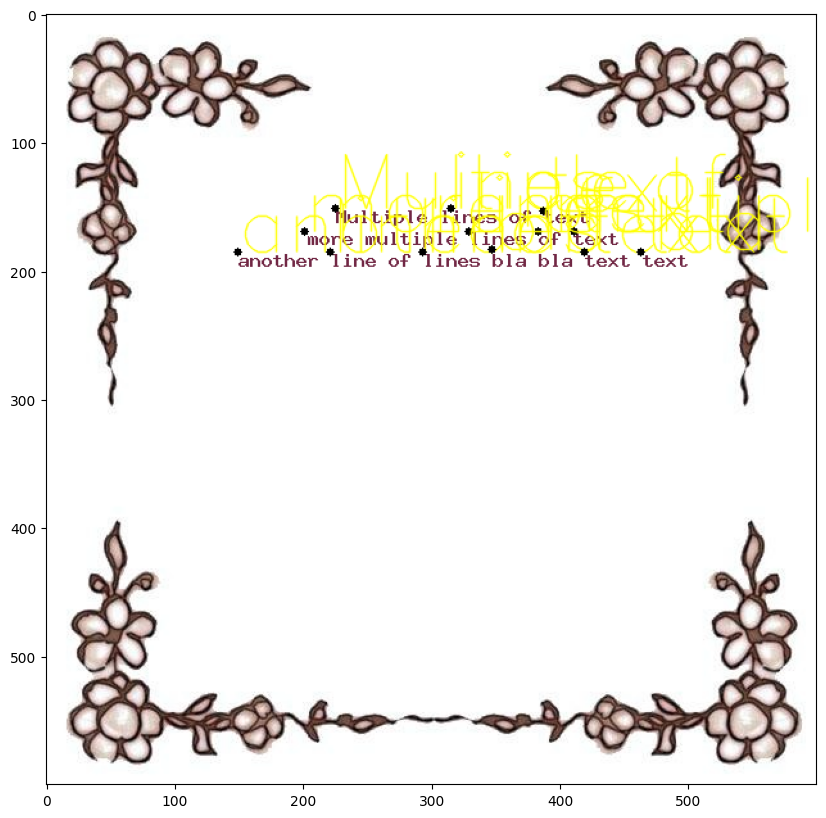

In [6]:
img = cv2.imread(image_path)
for detection in result:
    top_left = tuple([int(val) for val in detection[0][0]])
    bottom_right = tuple([int(val) for val in detection[0][0]])
    text = detection[1]
    img = cv2.rectangle(img, top_left, bottom_right, (0,0,0), 5)
    img = cv2.putText(img, text, top_left, font, 2, (255,255,0),1, cv2.LINE_AA)

plt.figure(figsize=(10,10))
plt.imshow(img)
plt.show()    

In [7]:
extracted_text = [detection[1] for detection in result]  #Just to get the text
for text in extracted_text:
    print(text)

Multiple
ines of
text
more multiple
lines
of
text
another
line of
lines
bla bla
text
text
